<a href="https://colab.research.google.com/github/dinoferre/Python-para-DS/blob/main/06(02)_Creando_Agrupamientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reporte de Análisis VII

## Creando Agrupamientos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('alquiler_residencial.csv', sep = ';')

In [3]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,16.67,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,50.00,Departamento


#### https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

In [4]:
datos['Valor'].mean()

5046.172821405663

In [5]:
barrios = ['Ate','Barranco','Comas','Lince','El Agustino','San Luis','Callao']
seleccion = datos['Distrito'].isin(barrios)
datos = datos[seleccion]

In [6]:
datos['Distrito'].drop_duplicates()

3              Ate
4            Comas
6      El Agustino
12        San Luis
13          Callao
22           Lince
172       Barranco
Name: Distrito, dtype: object

In [7]:
grupo_barrio = datos.groupby('Distrito')

In [8]:
type(grupo_barrio)

pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
grupo_barrio.groups

{'Ate': [3, 5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 62, 64, 68, 74, 79, 81, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 517, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, ...], 'Barranco': [172, 1026, 1160, 1671, 1992, 2077, 2622, 2977, 3264, 3676, 4740, 4780, 5465, 6429, 7723, 9054, 9516, 9557, 9849, 10098, 10801, 11032, 11349, 11460, 11687, 12111, 12177, 12191, 12745, 13356, 13443, 14280, 15033, 16028, 16318, 17763, 18685, 18738, 18779, 19495, 20876, 20905, 20924, 20925, 21312, 21356, 21521], 'Callao': [13, 58, 83, 106, 123, 135, 156, 163, 188, 204, 222, 271, 305, 306, 346, 383, 455, 491, 533, 605, 688, 700, 782, 814, 863, 884, 969, 1103, 1107, 1357, 1445, 1500, 1527, 1531

In [10]:
for barrio, data in grupo_barrio:
    print('{} -> {}'.format(barrio, data.Valor.mean()))

Ate -> 6940.4485201113075
Barranco -> 1403.8297872340424
Callao -> 4814.694736842105
Comas -> 8659.095015576324
El Agustino -> 1070.5652173913043
Lince -> 1542.8198847262247
San Luis -> 1720.4308510638298


In [11]:
grupo_barrio[['Valor', 'Mantenimiento']].mean().round(2)

,Valor,Mantenimiento
Distrito,,
Ate,6940.45,3514.54
Barranco,1403.83,324.89
Callao,4814.69,681.02
Comas,8659.10,2088.96
El Agustino,1070.57,184.52
Lince,1542.82,384.66
San Luis,1720.43,471.70


## Estadísticas Descriptivas

In [12]:
grupo_barrio['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Ate,3953.0,6940.45,11771.26,560.0,2500.0,4300.0,8500.0,600000.0
Barranco,47.0,1403.83,1496.62,450.0,800.0,1100.0,1200.0,8000.0
Callao,475.0,4814.69,44402.54,500.0,1200.0,1700.0,2200.0,800000.0
Comas,1926.0,8659.10,8192.67,400.0,3800.0,6500.0,10000.0,90000.0
El Agustino,115.0,1070.57,511.60,500.0,800.0,1000.0,1200.0,4500.0
Lince,694.0,1542.82,1423.40,300.0,807.5,1200.0,1800.0,15000.0
San Luis,376.0,1720.43,1213.74,500.0,1000.0,1400.0,1900.0,10000.0


In [13]:
grupo_barrio['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Distrito,,
Ate,560.0,600000.0
Barranco,450.0,8000.0
Callao,500.0,800000.0
Comas,400.0,90000.0
El Agustino,500.0,4500.0
Lince,300.0,15000.0
San Luis,500.0,10000.0


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio del Alquiler por Distrito')

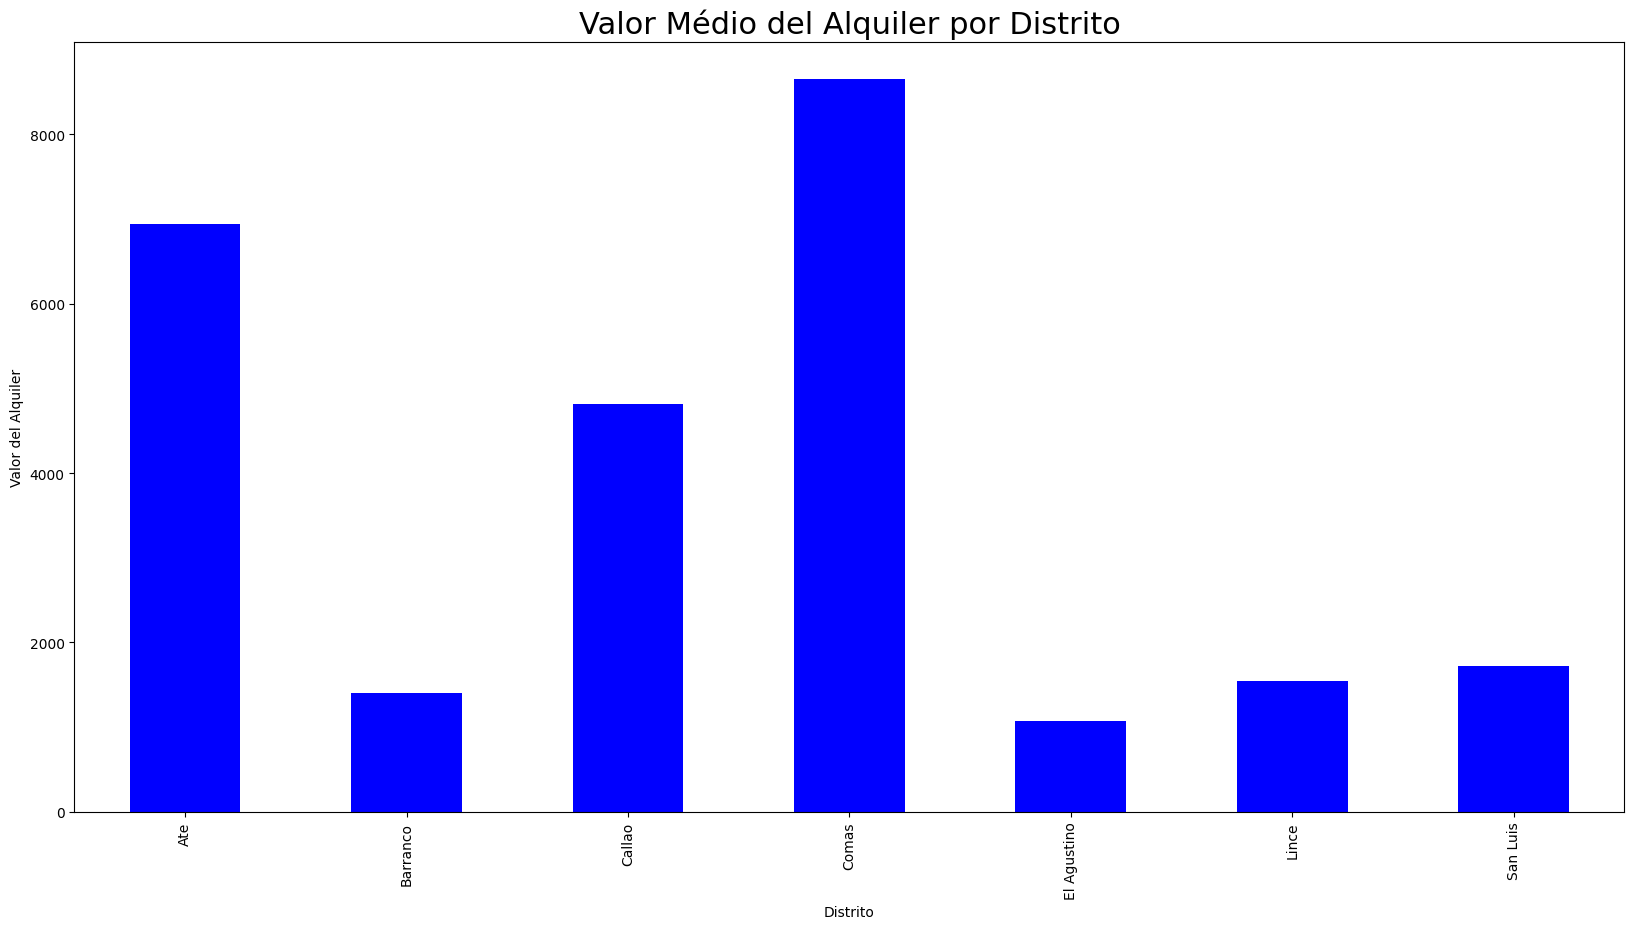

In [15]:
fig = grupo_barrio['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor del Alquiler')
fig.set_title('Valor Médio del Alquiler por Distrito', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio del Alquiler por Distrito')

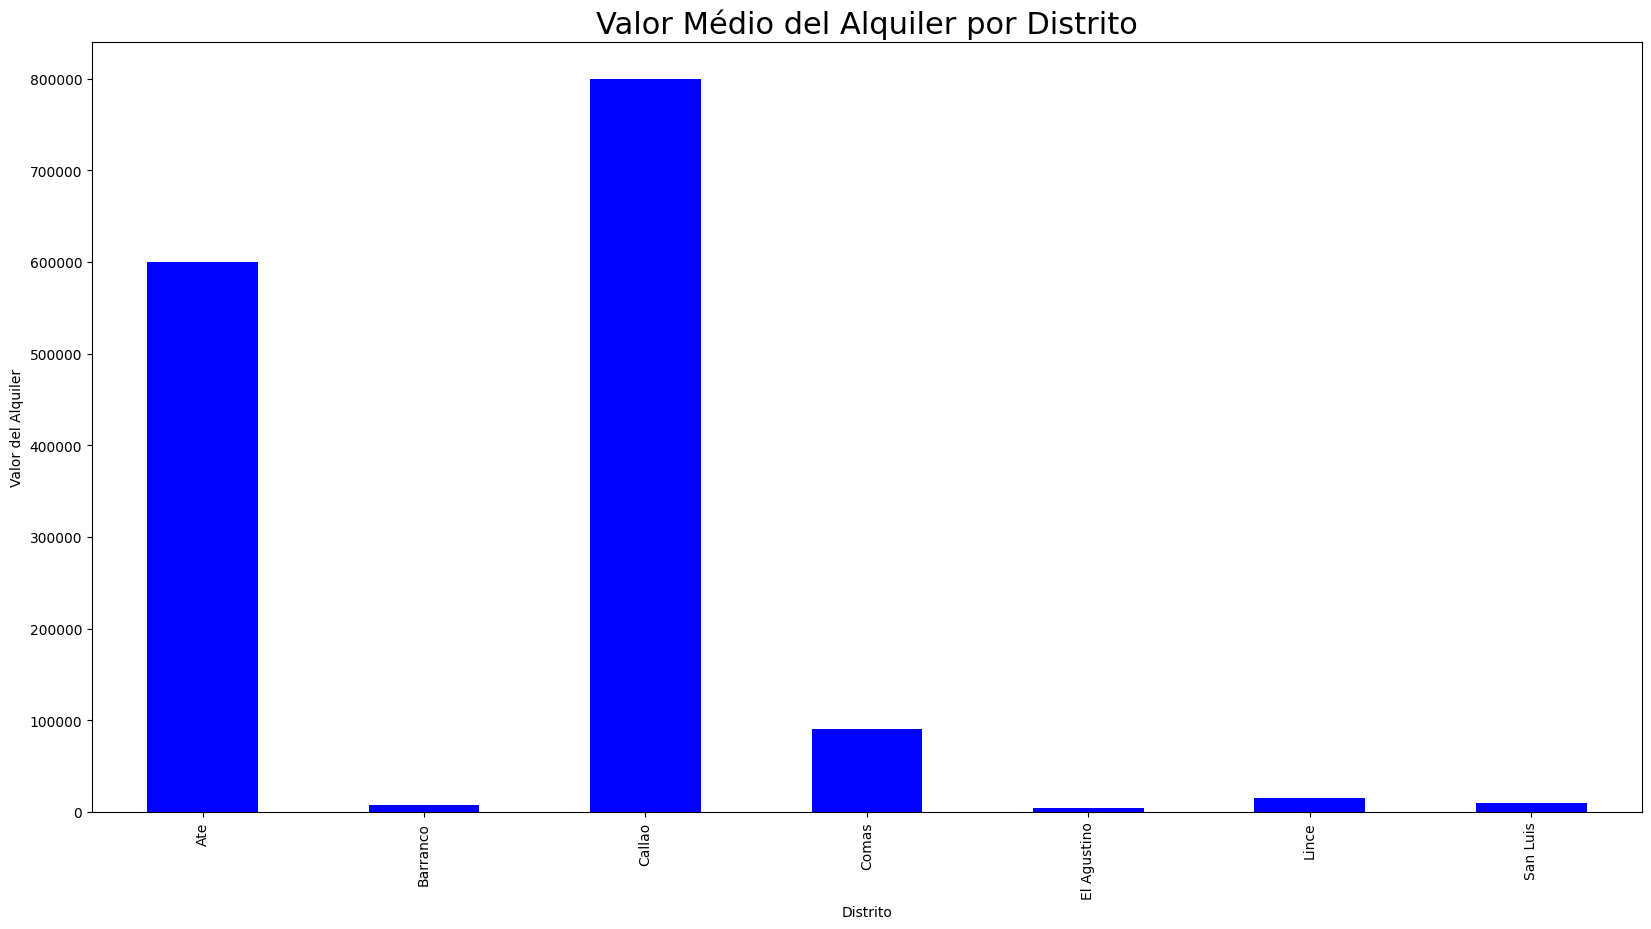

In [16]:
fig = grupo_barrio['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor del Alquiler')
fig.set_title('Valor Médio del Alquiler por Distrito', {'fontsize': 22})